In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='date'>

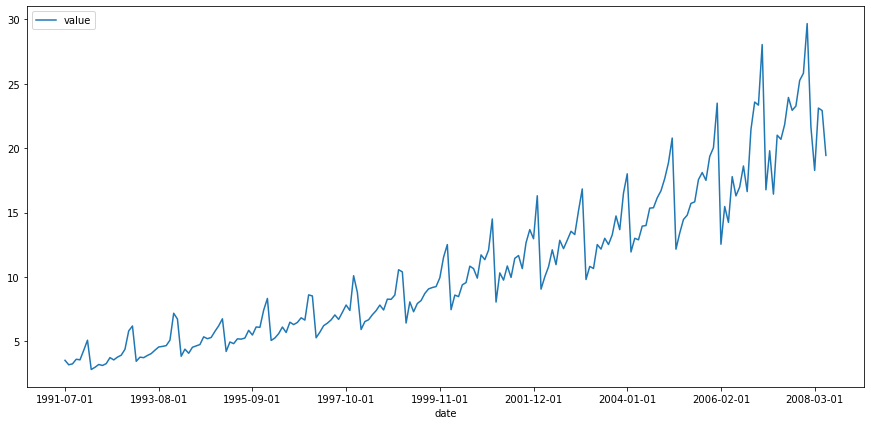

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/bapimentel/Ciencia-de-Dados/master/Dados/Drugs.csv')
df.head()

# Updating the header
df.head()
df.describe()
df.set_index('date',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller


In [21]:
test_result=adfuller(df['value'])


In [23]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['value'])

weak evidence against null hypothesis,indicating it is non-stationary 
ADF Test Statistic : 3.1451856893067434
p-value : 1.0
#Lags Used : 15
Number of Observations : 188


In [24]:
df['value First Difference'] = df['value'] - df['value'].shift(1)
df['Seasonal First Difference']=df['value']-df['value'].shift(12)
df.head()

,value,value First Difference,Seasonal First Difference
date,,,
1991-07-01,3.526591,NaN,NaN
1991-08-01,3.180891,-0.345700,NaN
1991-09-01,3.252221,0.071330,NaN
1991-10-01,3.611003,0.358782,NaN
1991-11-01,3.565869,-0.045134,NaN


In [25]:
adfuller_test(df['Seasonal First Difference'].dropna())


ADF Test Statistic : -2.092722659642393
p-value : 0.24745090770394668
#Lags Used : 13
Number of Observations : 178


<AxesSubplot:xlabel='date'>

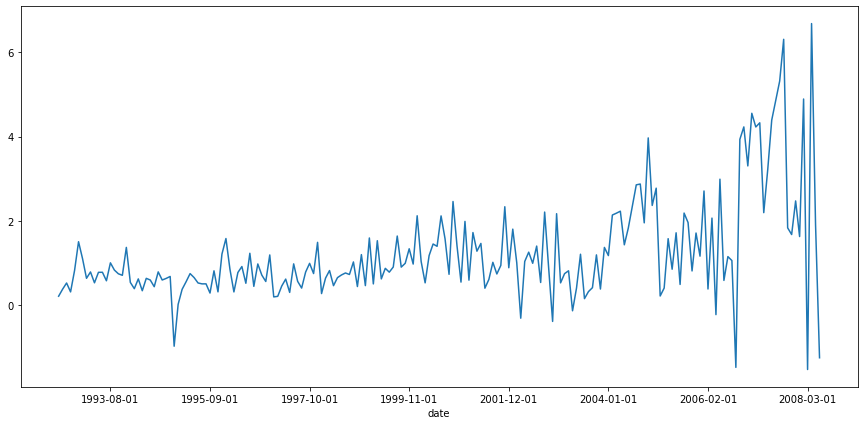

In [26]:
df['Seasonal First Difference'].plot()

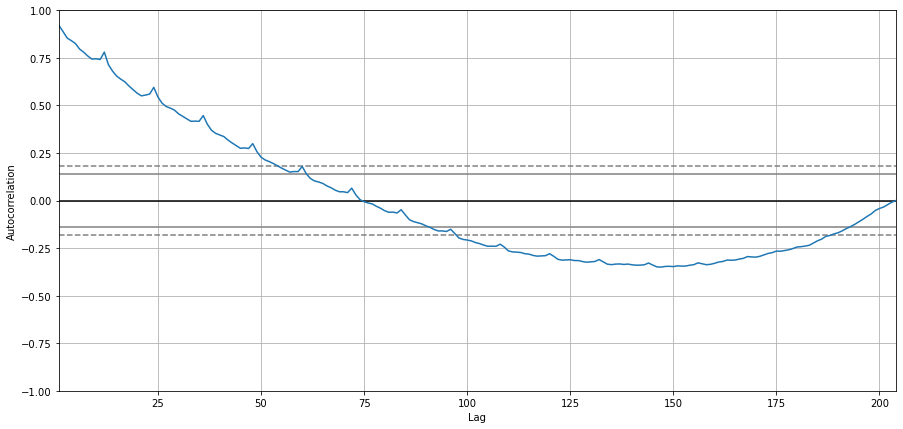

In [28]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['value'])
plt.show()

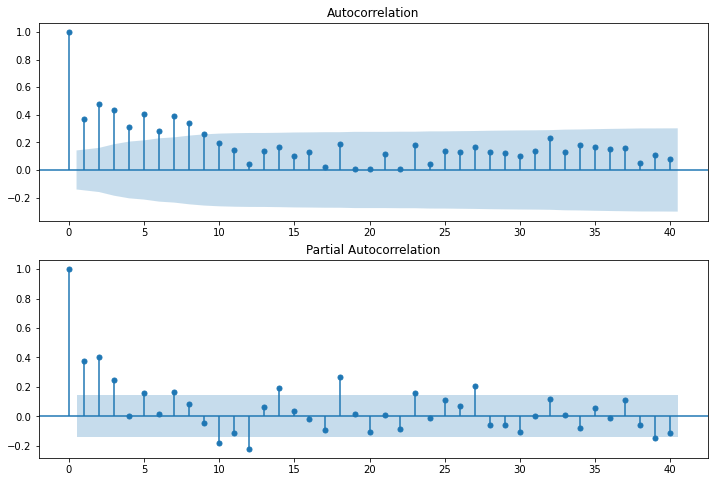

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [31]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['value'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\jjjad\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\jjjad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -417.919
Method:                       css-mle   S.D. of innovations              1.890
Date:                Wed, 28 Apr 2021   AIC                            843.838
Time:                        04:38:17   BIC                            857.091
Sample:                    08-01-1991   HQIC                           849.200
                         - 06-01-2008                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0965      0.017      5.650      0.000       0.063       0.130
ar.L1.D.value     0.3140      0.075      4.183      0.000       0.167       0.461
ma.L1.D.value    -0.9164      0.026    -34.914      0.000      -0.968      -0.865
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.1845           +0.0000j            3.1845            0.0000
MA.1            1.0912           +0.0000j            1.0912            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='date'>

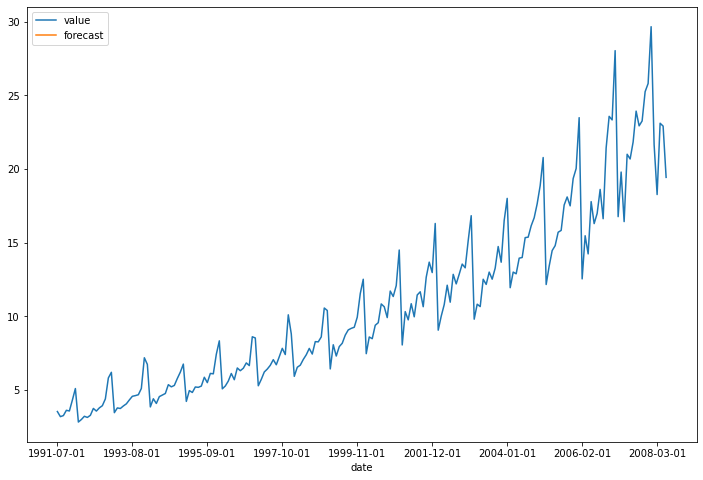

In [33]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['value','forecast']].plot(figsize=(12,8))

C:\Users\jjjad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jjjad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='date'>

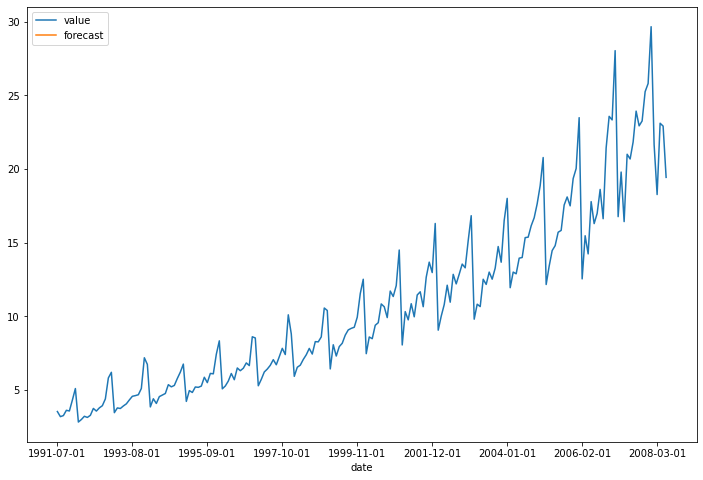

In [35]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['value','forecast']].plot(figsize=(12,8))